In [1]:
import warnings
warnings.filterwarnings('ignore')

# Base libraries
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import BASE_COLORS
%matplotlib inline

# sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor

In [2]:
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix

In [3]:
df = pd.read_csv('2022-2023_data.csv')

In [4]:
df

,Unnamed: 0,player,country_of_origin,team,age,annual_wages_eur,league,mp,starts,min,...,totdist,mis,dis,rec,position,position_defence,position_forward,position_goalkeeper,position_midfield,age_category
0,0,Sadio Mané,SEN,Bayern Munich,30.0,22000000.0,Bundes Liga,25.0,25.0,25.0,...,2602.000000,53.000000,14.000000,486.000000,Forward,0.0,1.0,0.0,0.0,middle_age
1,1,Manuel Neuer,GER,Bayern Munich,36.0,21000000.0,Bundes Liga,12.0,12.0,12.0,...,1534.000000,1.000000,0.000000,318.000000,Goalkeeper,0.0,0.0,1.0,0.0,seniors
2,2,Thomas Müller,GER,Bayern Munich,32.0,20500000.0,Bundes Liga,27.0,27.0,27.0,...,2013.000000,49.000000,20.000000,791.000000,Forward,0.0,1.0,0.0,0.0,seniors
3,3,Leroy Sané,GER,Bayern Munich,26.0,20000000.0,Bundes Liga,32.0,32.0,32.0,...,6150.000000,60.000000,60.000000,1134.000000,Midfield,0.0,0.0,0.0,1.0,middle_age
4,4,Joshua Kimmich,GER,Bayern Munich,27.0,19500000.0,Bundes Liga,33.0,33.0,33.0,...,8923.000000,26.000000,26.000000,2065.000000,Midfield,0.0,0.0,0.0,1.0,middle_age
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2708,2708,Chem Campbell,WAL,Wolves,19.0,152100.0,Premier League,5.0,5.0,5.0,...,303.000000,3.000000,6.000000,36.000000,Forward,0.0,1.0,0.0,0.0,young
2709,2709,Jordan Smith,ENG,Nott'ham Forest,27.0,152100.0,Premier League,19.0,19.0,19.0,...,2240.166937,18.965559,11.201783,484.121151,Goalkeeper,0.0,0.0,1.0,0.0,middle_age
2710,2710,Will Dennis,ENG,Bournemouth,22.0,121680.0,Premier League,19.0,19.0,19.0,...,2240.166937,18.965559,11.201783,484.121151,Goalkeeper,0.0,0.0,1.0,0.0,young
2711,2711,Leo Fuhr Hjelde,NOR,Leeds United,18.0,121680.0,Premier League,19.0,19.0,19.0,...,2240.166937,18.965559,11.201783,484.121151,Defence,1.0,0.0,0.0,0.0,young


In [5]:
categorical = df.select_dtypes(include=object)
numerical = df.select_dtypes(include=np.number)

In [6]:
def discrete_continuous(df):
    discrete_lst = []
    continuous_lst = []
    for col in df.columns:
        if len(df[col].unique()) < (df.shape[0] * 0.02):
            discrete_lst.append(col)
        else:
            continuous_lst.append(col)
    return (discrete_lst, continuous_lst)

In [7]:
discrete_lst, continuous_lst = discrete_continuous(numerical)

In [8]:
print(discrete_lst)
print(continuous_lst)

['age', 'mp', 'starts', 'min', 'gls', 'ast', 'g+a', 'g-pk', 'pk', 'pkatt', 'crdy', 'crdr', 'position_defence', 'position_forward', 'position_goalkeeper', 'position_midfield']
['Unnamed: 0', 'annual_wages_eur', '90s', 'xg', 'npxg', 'xag', 'npxg+xag', 'prgc', 'prgp', 'prgr', 'gls_90', 'ast_90', 'g+a_90', 'g-pk_90', 'g+a-pk_90', 'xg_90', 'xag_90', 'xg+xag_90', 'npxg_90', 'npxg+xag_90', 'touches', 'att_pen', 'att', 'succ', 'carries', 'totdist', 'mis', 'dis', 'rec']


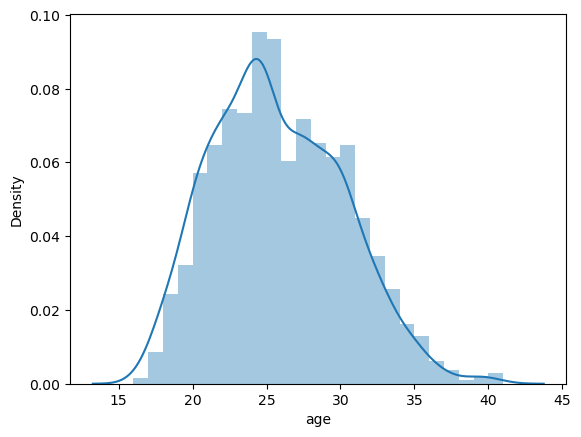

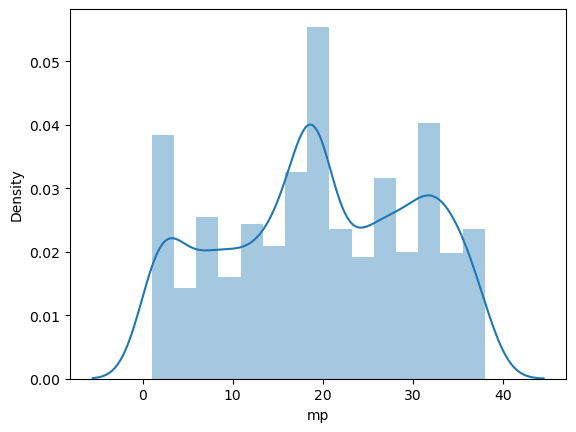

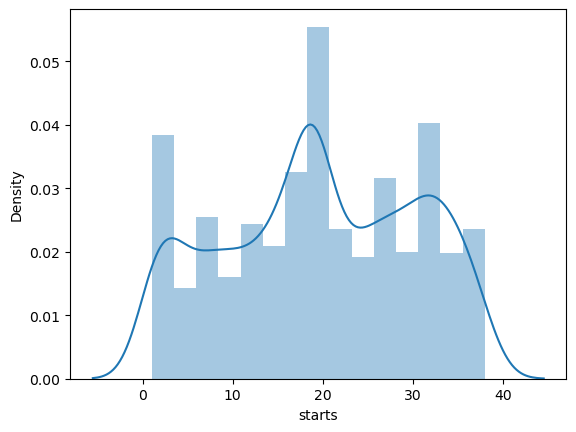

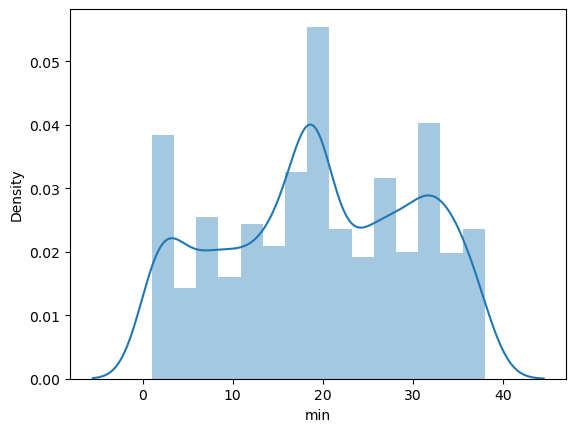

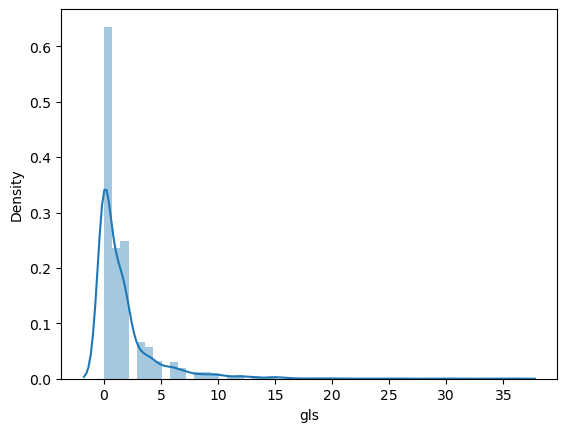

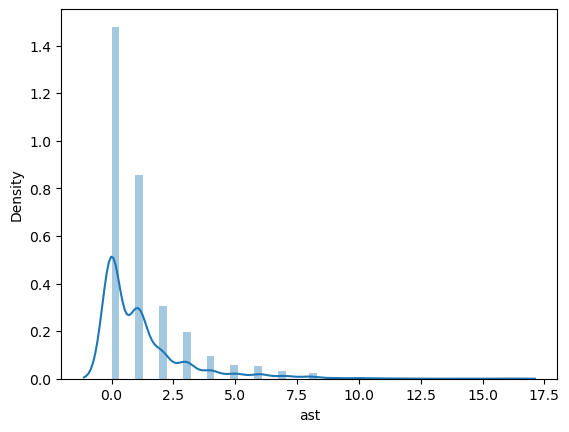

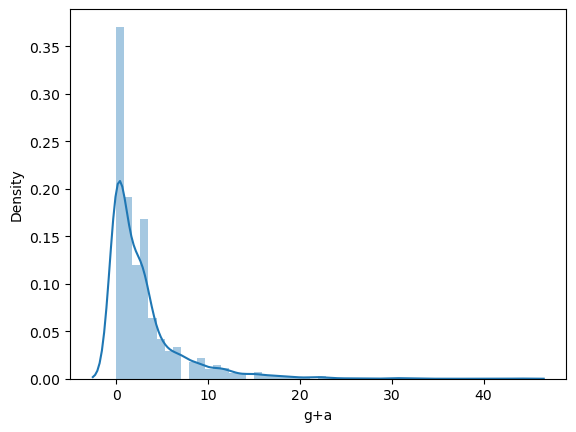

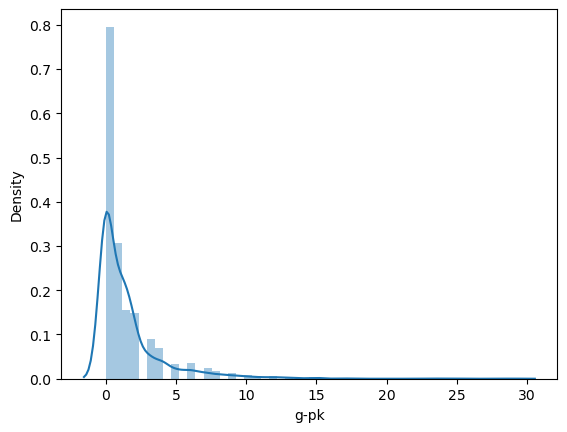

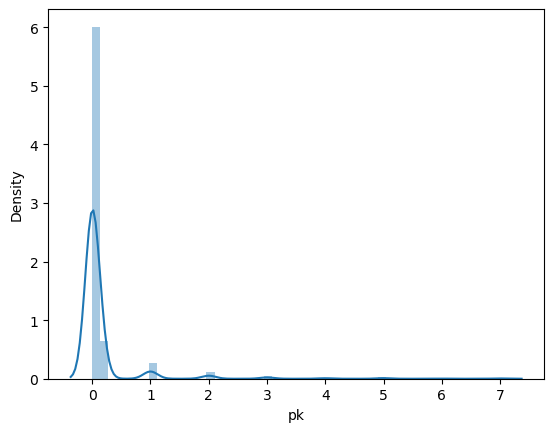

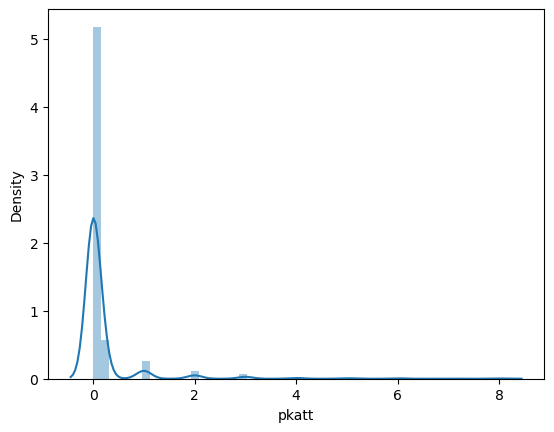

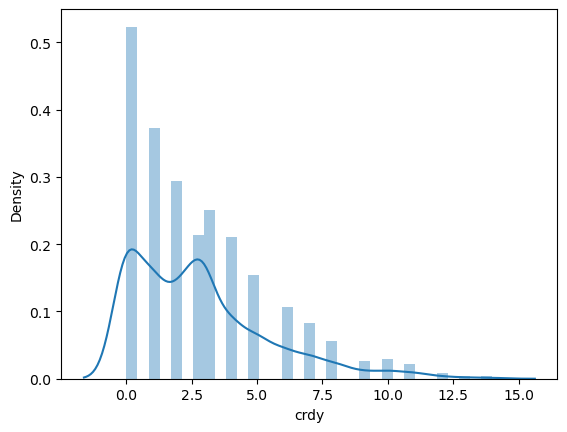

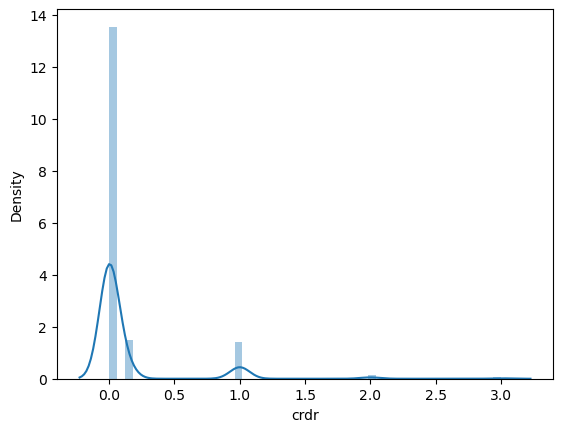

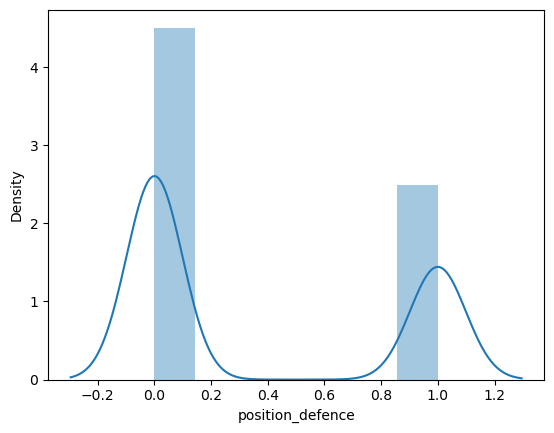

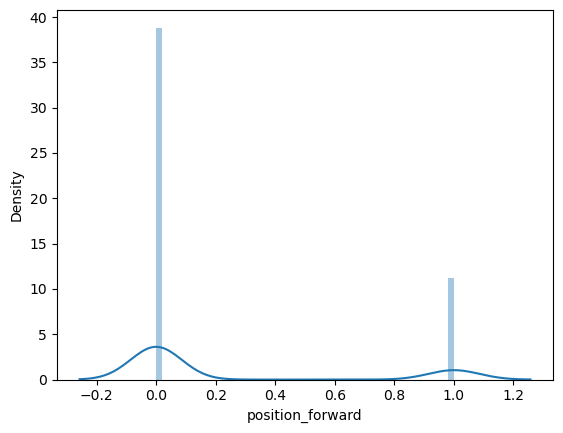

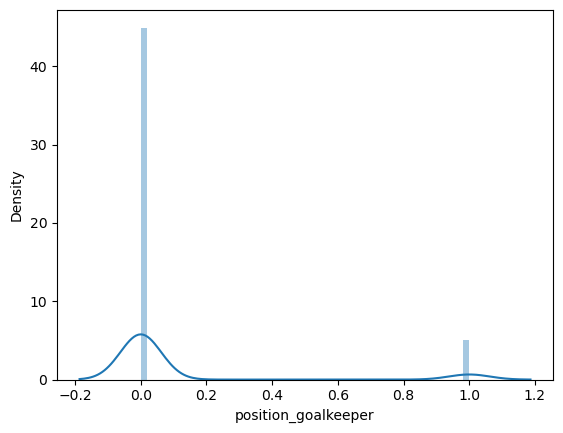

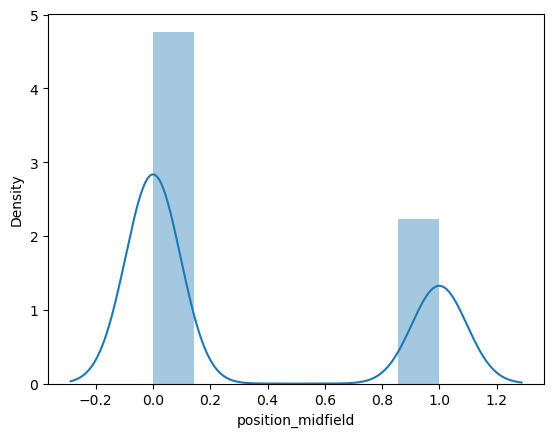

In [9]:
# Plots for variable types
for column in numerical[discrete_lst]:
    sns.distplot(numerical[column])
    plt.show()

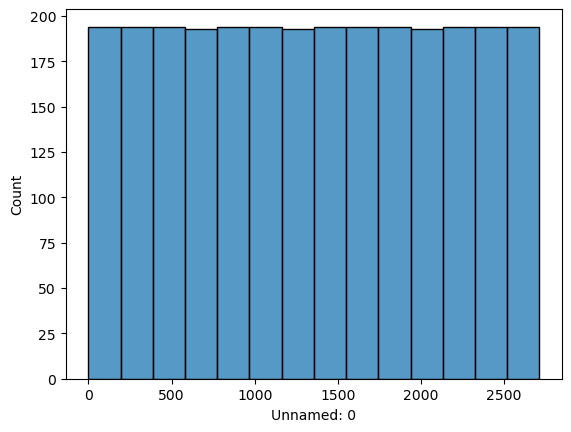

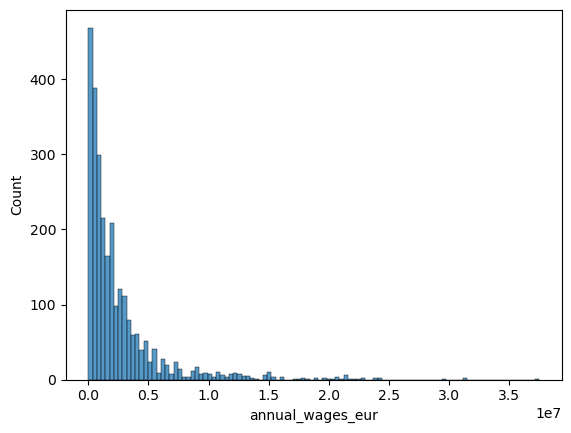

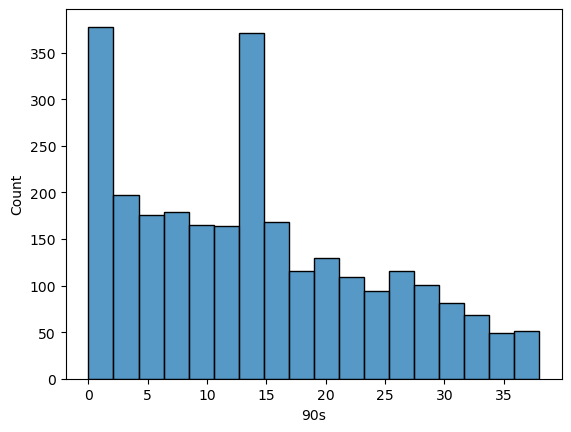

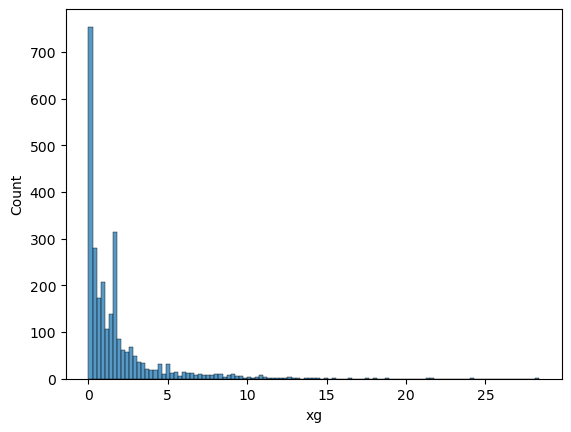

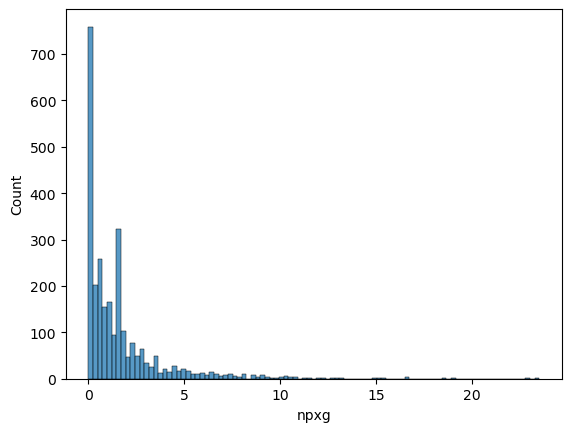

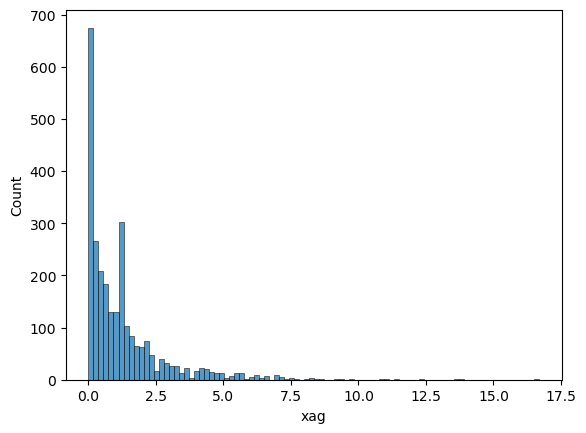

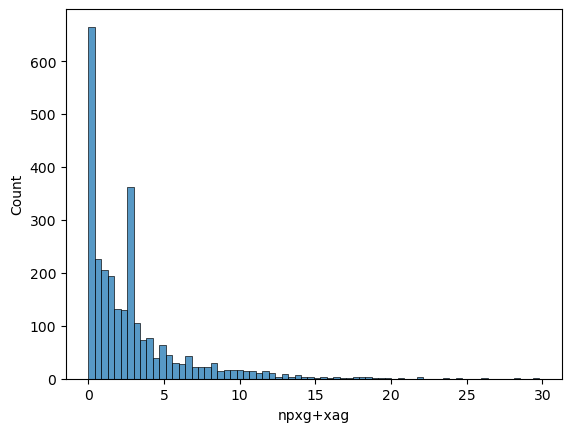

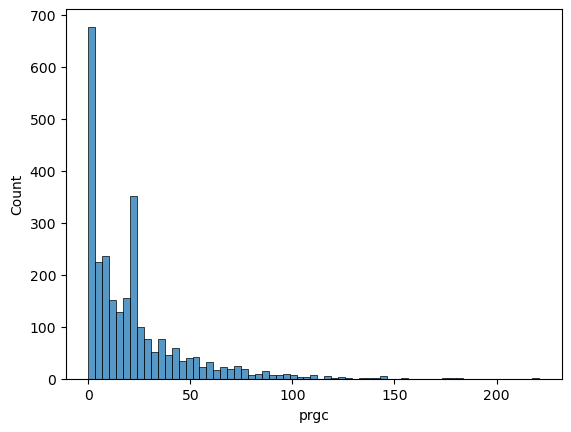

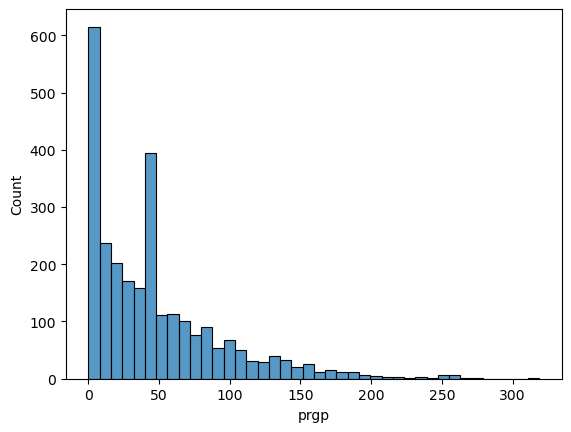

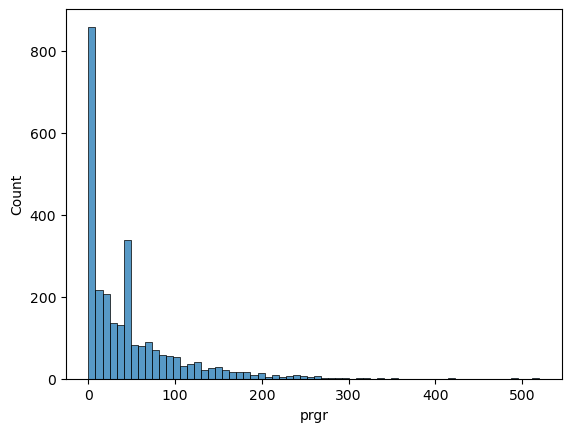

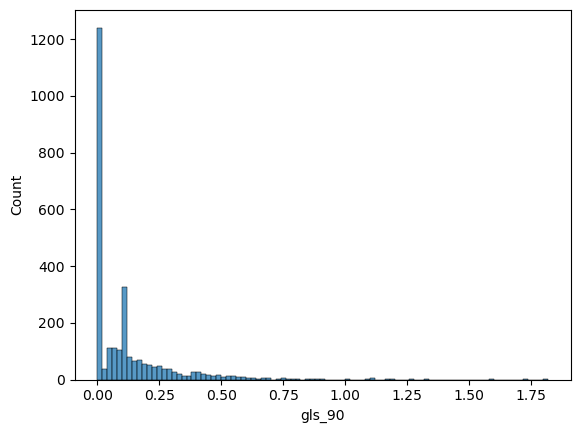

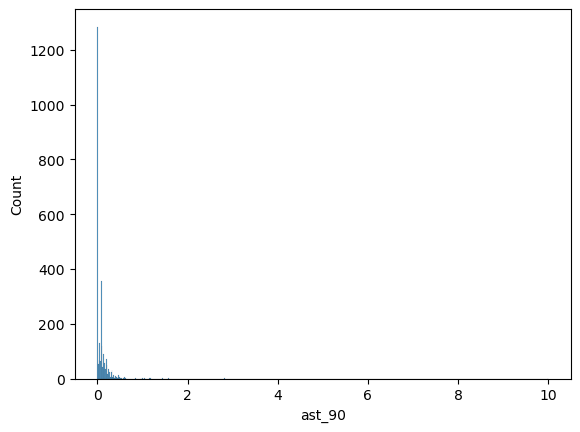

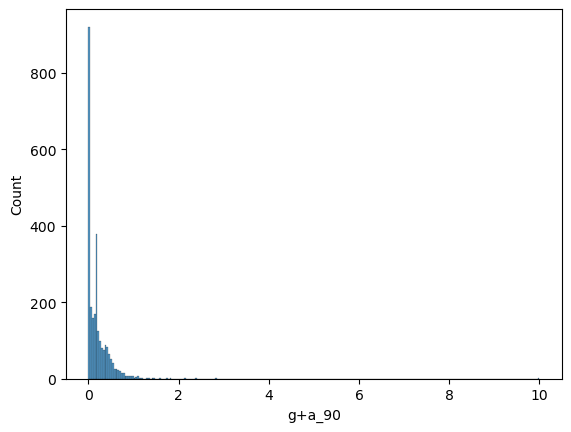

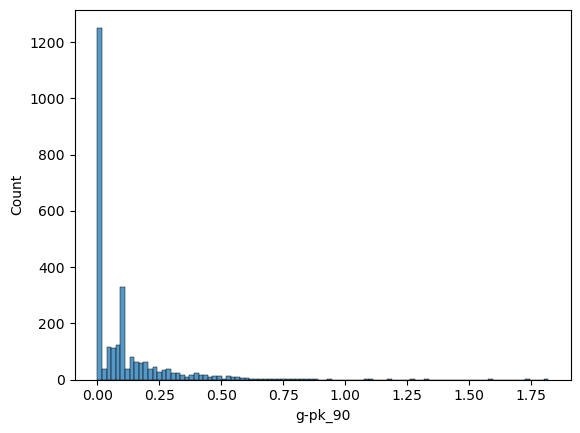

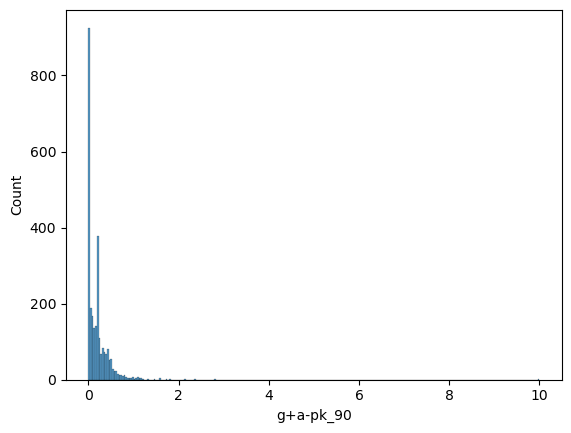

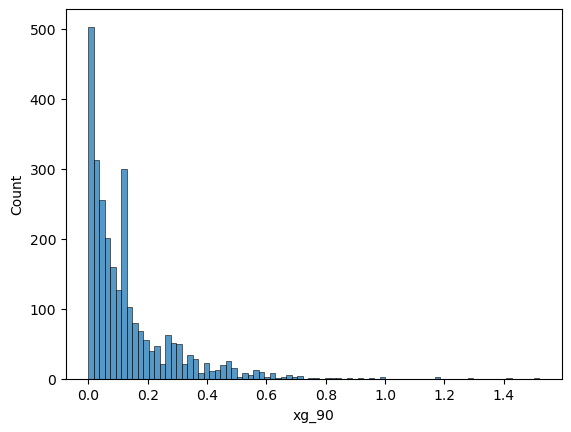

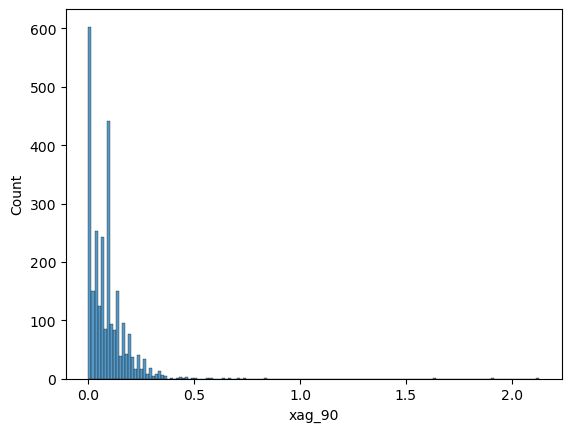

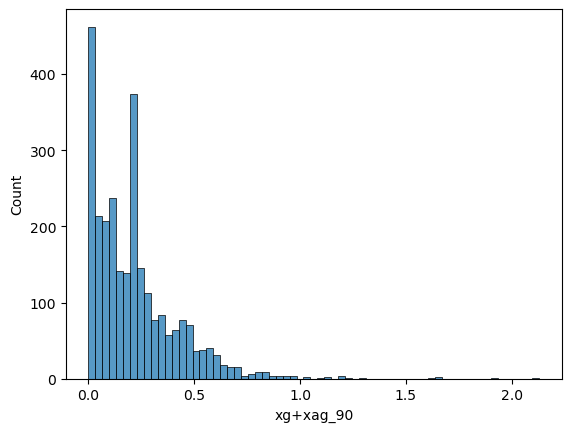

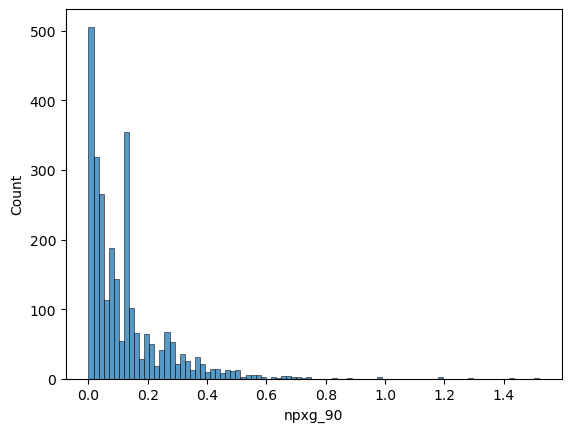

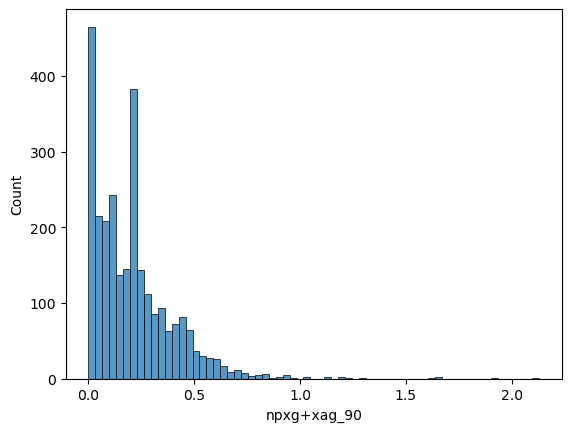

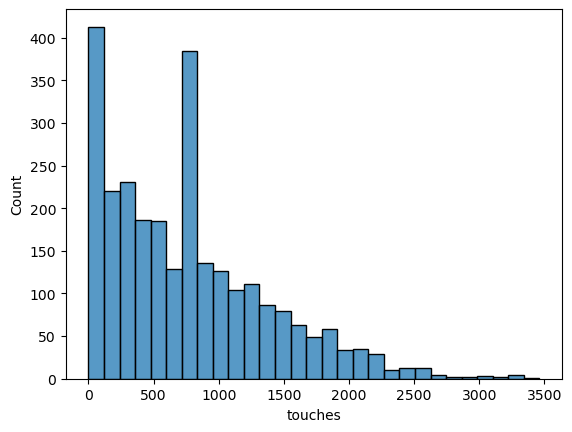

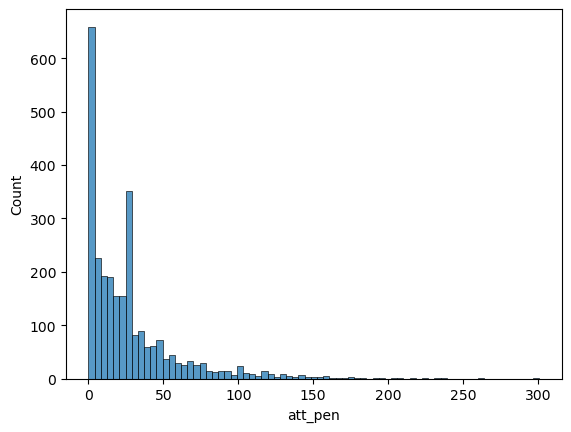

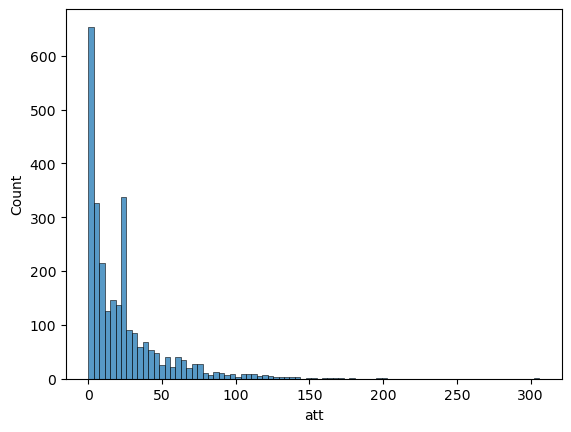

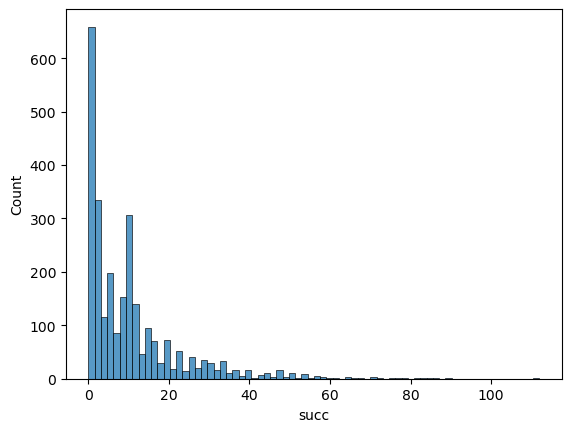

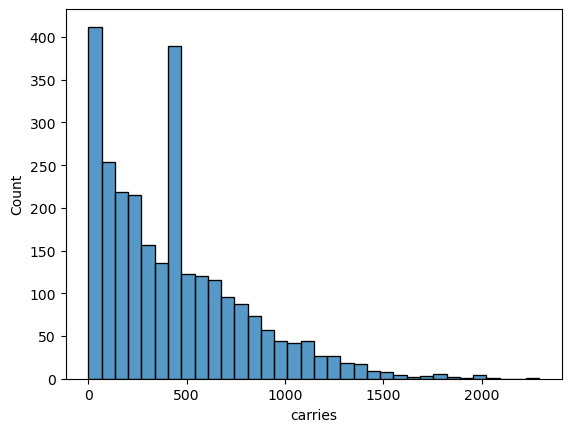

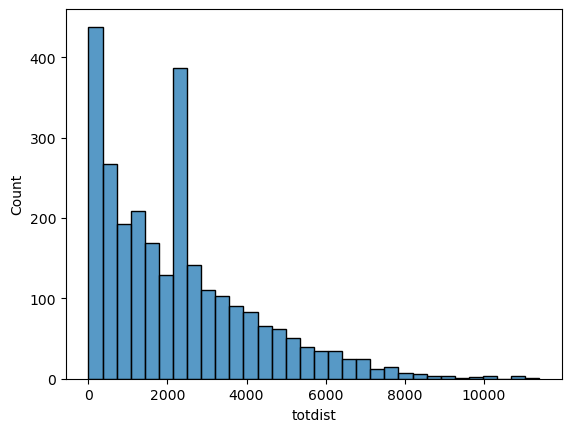

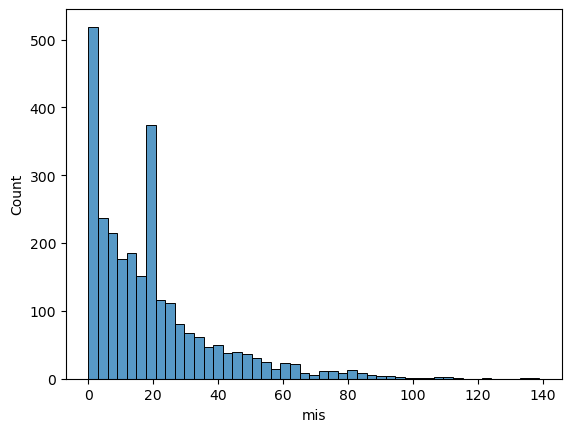

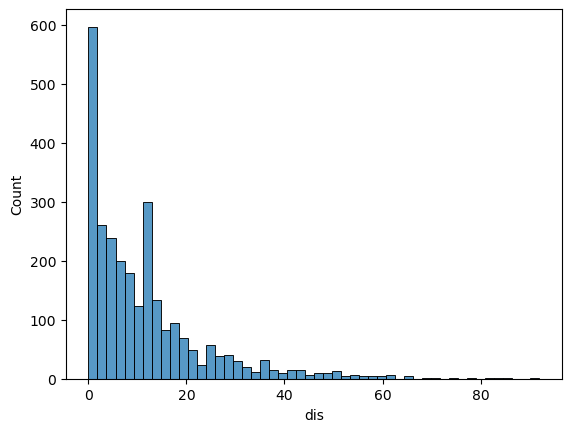

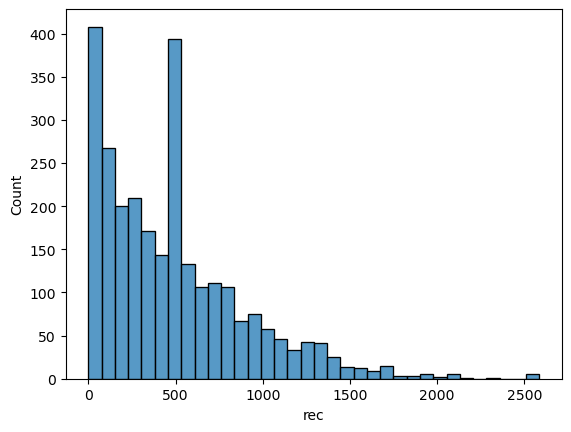

In [10]:
for column in numerical[continuous_lst]:
    sns.histplot(numerical[column])
    plt.show()

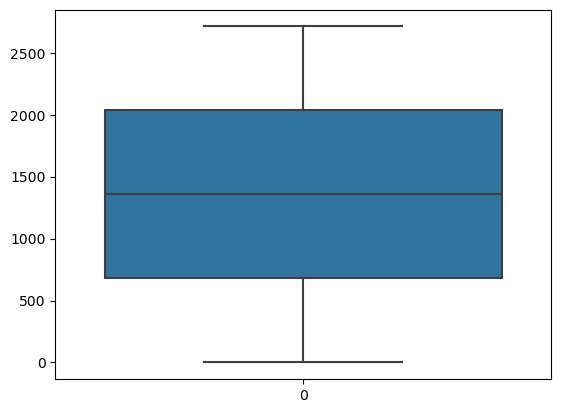

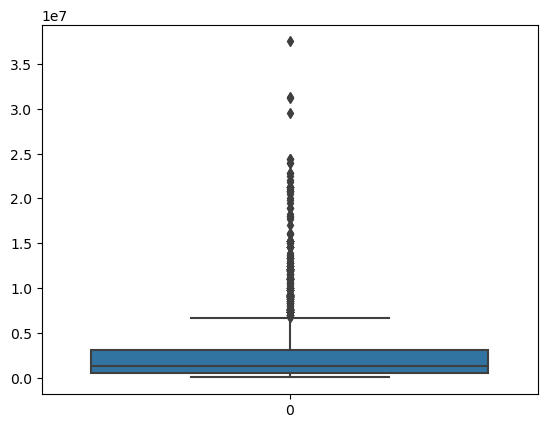

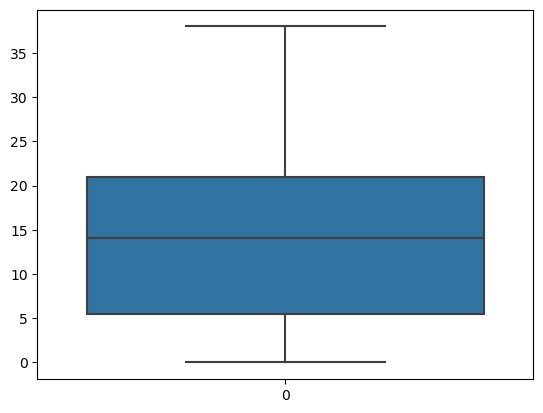

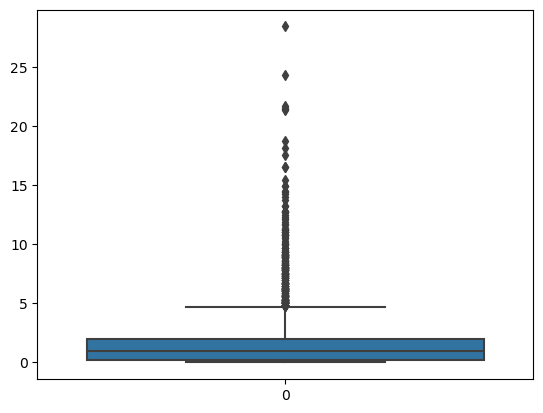

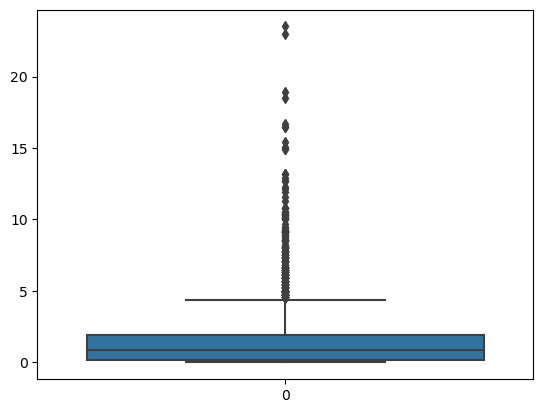

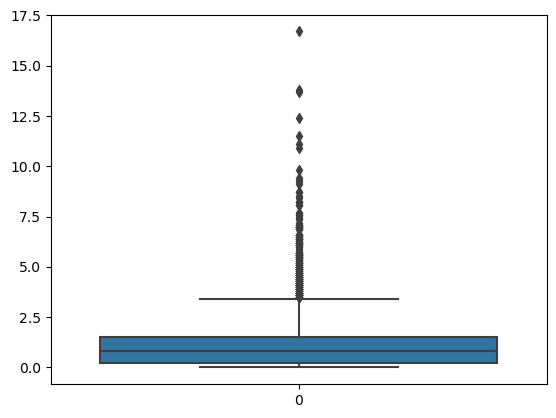

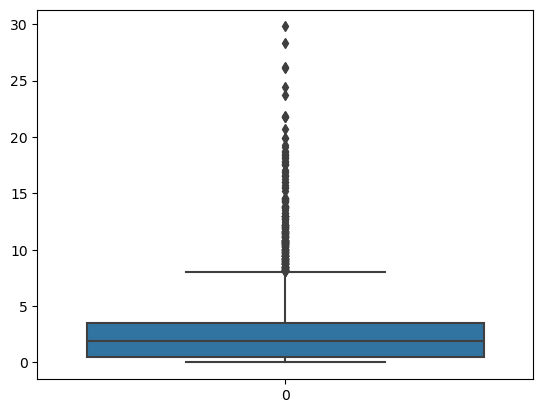

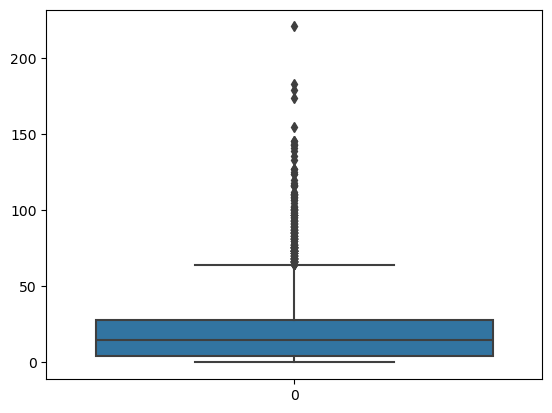

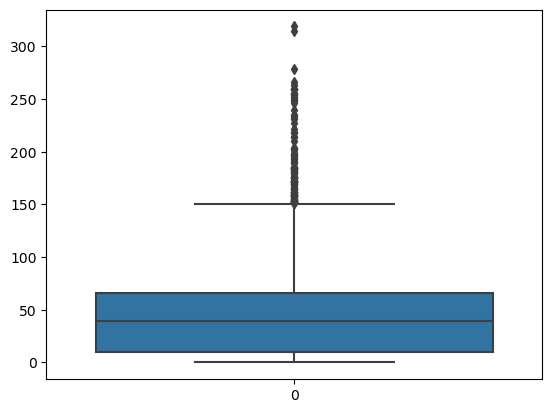

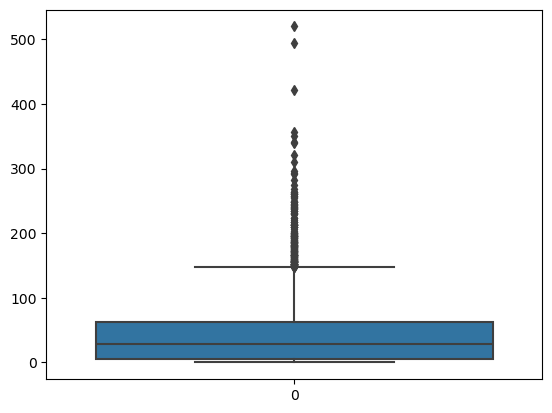

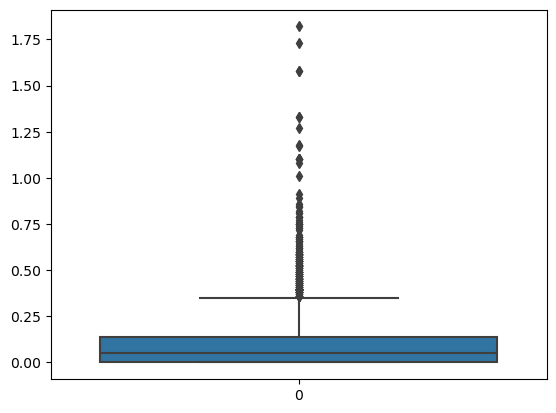

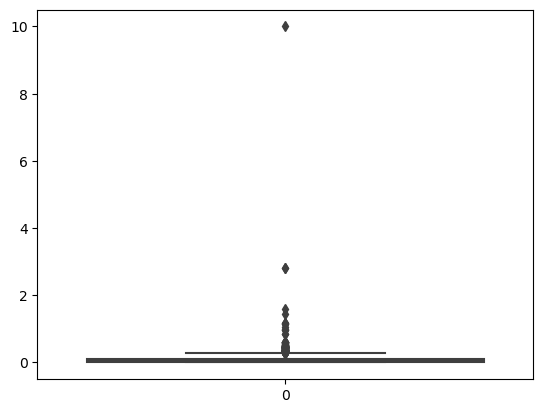

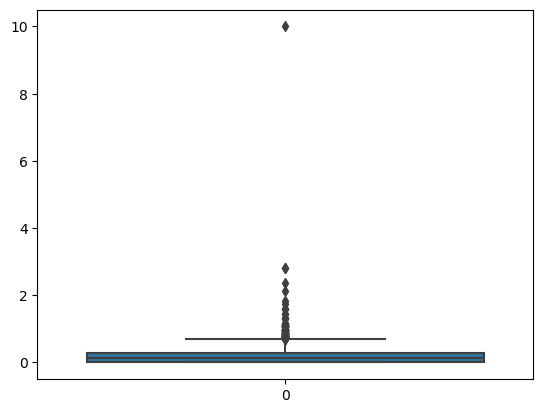

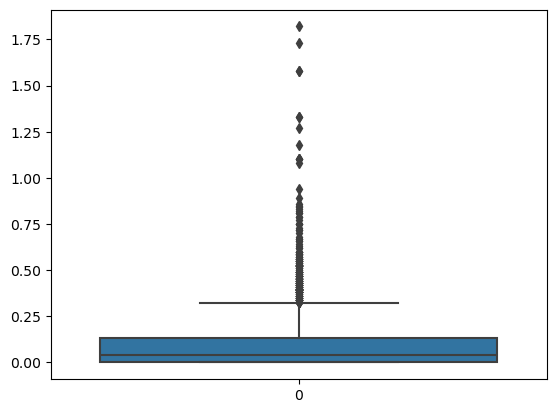

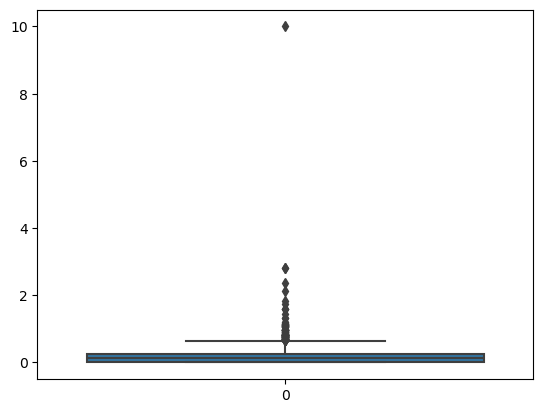

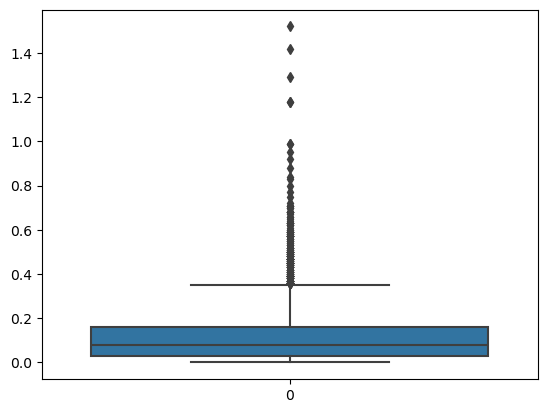

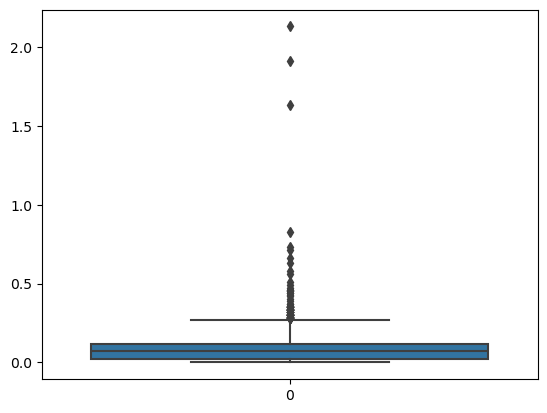

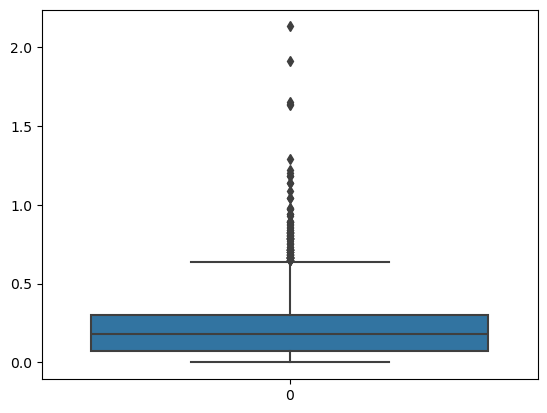

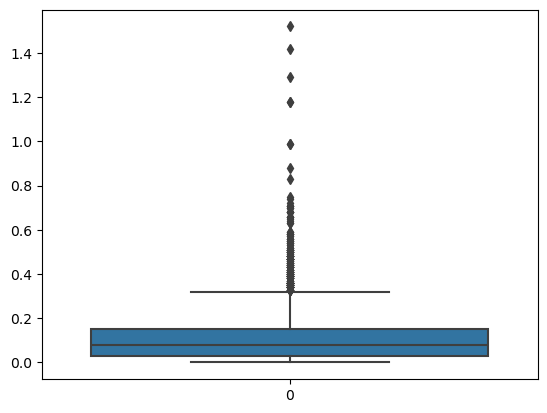

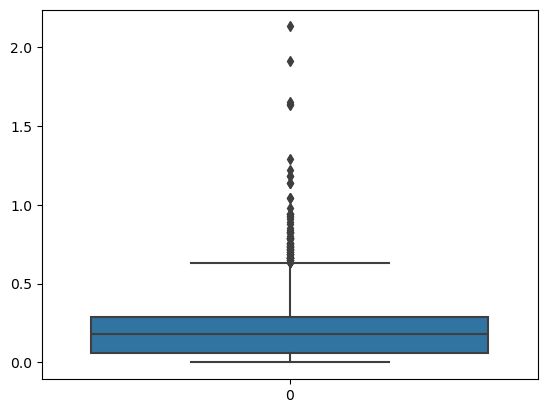

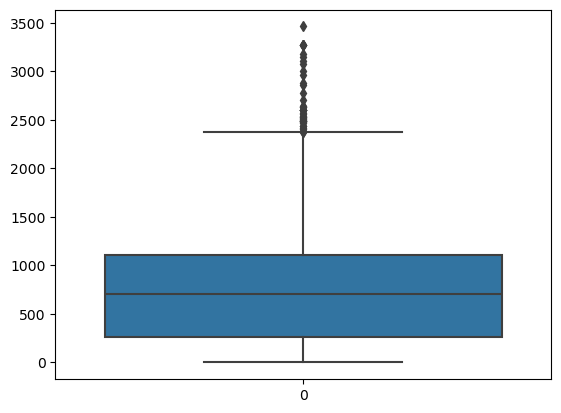

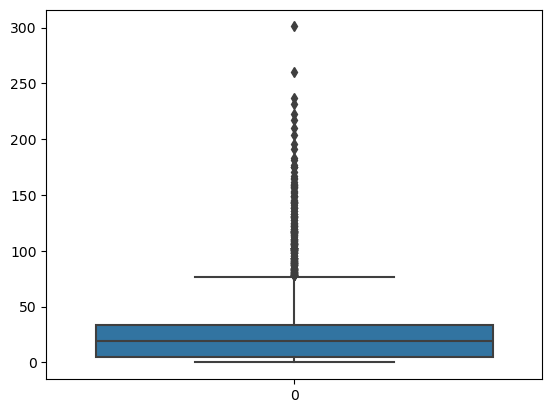

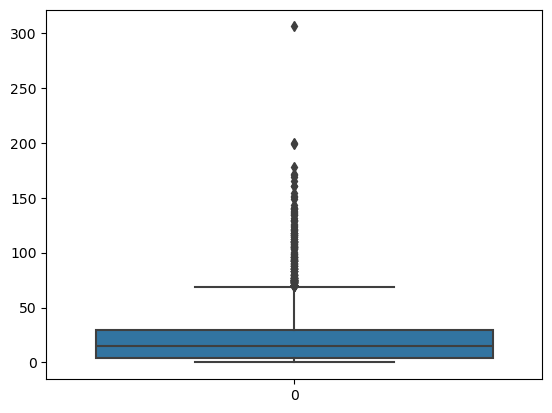

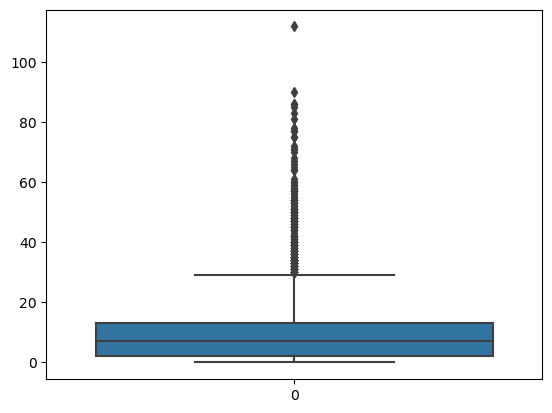

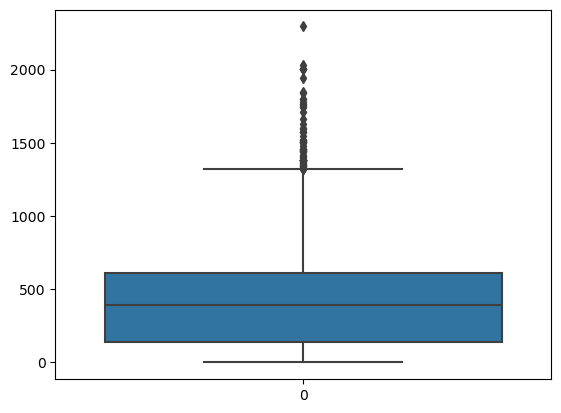

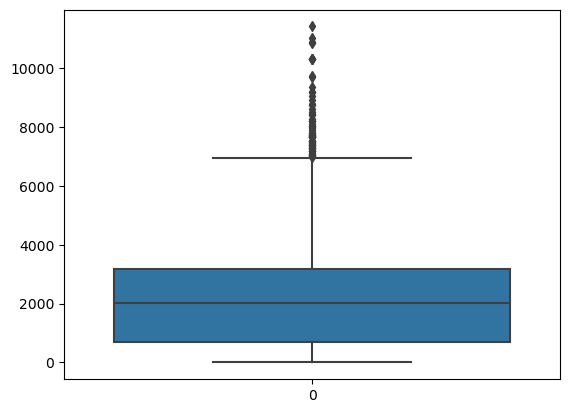

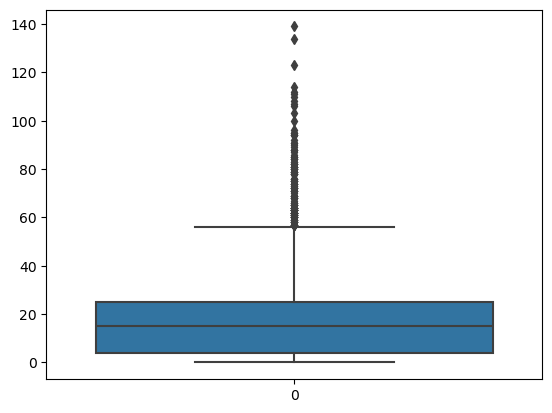

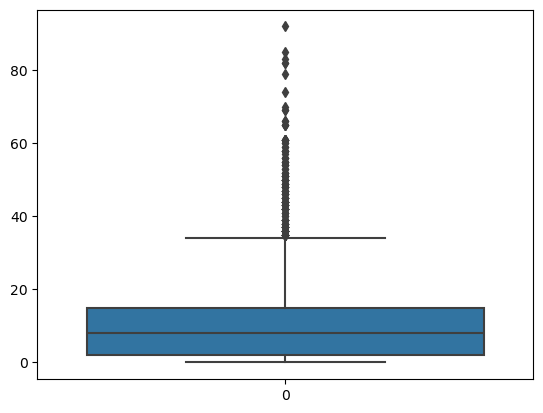

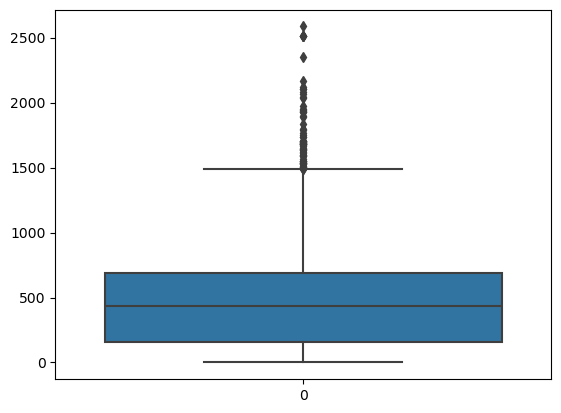

In [11]:
# OUTLIERS in continuous variables
for column in numerical[continuous_lst]:
    sns.boxplot(numerical[column])
    plt.show()

In [12]:
numerical.isna().sum()

Unnamed: 0             0
age                    0
annual_wages_eur       0
mp                     0
starts                 0
min                    0
90s                    0
gls                    0
ast                    0
g+a                    0
g-pk                   0
pk                     0
pkatt                  0
crdy                   0
crdr                   0
xg                     0
npxg                   0
xag                    0
npxg+xag               0
prgc                   0
prgp                   0
prgr                   0
gls_90                 0
ast_90                 0
g+a_90                 0
g-pk_90                0
g+a-pk_90              0
xg_90                  0
xag_90                 0
xg+xag_90              0
npxg_90                0
npxg+xag_90            0
touches                0
att_pen                0
att                    0
succ                   0
carries                0
totdist                0
mis                    0
dis                    0


In [13]:
numerical = numerical.drop(['Unnamed: 0'], axis = 1)

In [14]:
numerical.isna().sum()

age                    0
annual_wages_eur       0
mp                     0
starts                 0
min                    0
90s                    0
gls                    0
ast                    0
g+a                    0
g-pk                   0
pk                     0
pkatt                  0
crdy                   0
crdr                   0
xg                     0
npxg                   0
xag                    0
npxg+xag               0
prgc                   0
prgp                   0
prgr                   0
gls_90                 0
ast_90                 0
g+a_90                 0
g-pk_90                0
g+a-pk_90              0
xg_90                  0
xag_90                 0
xg+xag_90              0
npxg_90                0
npxg+xag_90            0
touches                0
att_pen                0
att                    0
succ                   0
carries                0
totdist                0
mis                    0
dis                    0
rec                    0


In [15]:
categorical.isna().sum()

player               0
country_of_origin    0
team                 0
league               0
position             0
age_category         0
dtype: int64

In [16]:
# player has all unique values, dropping before I plot
categorical2 = categorical.drop(['player'], axis = 1)

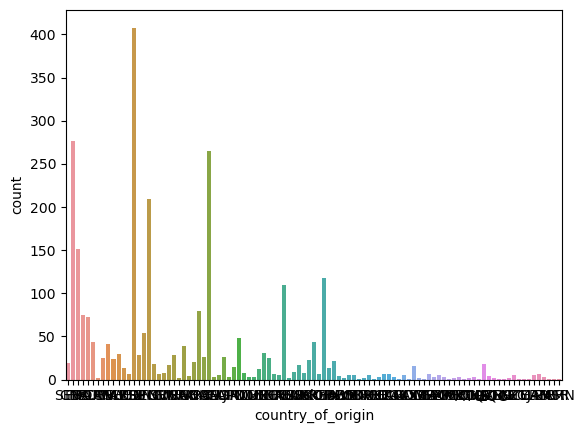

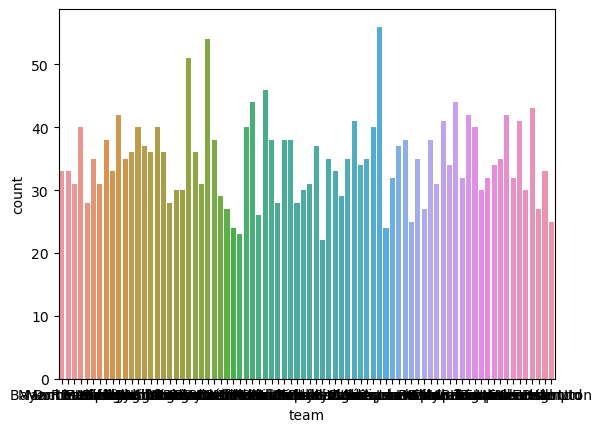

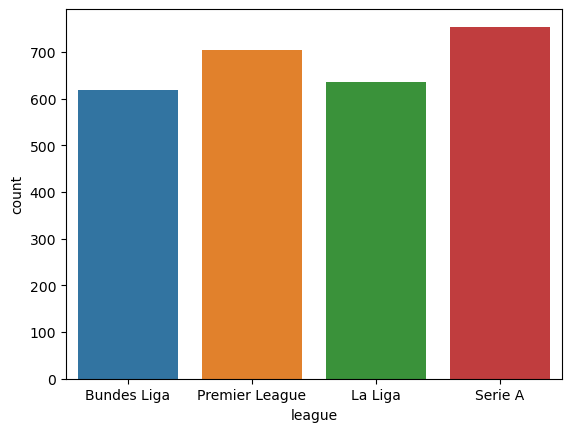

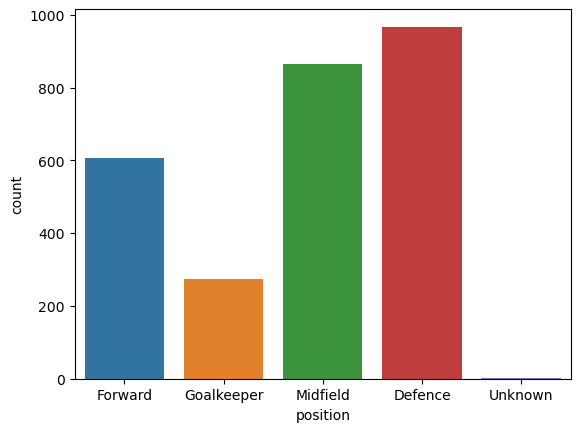

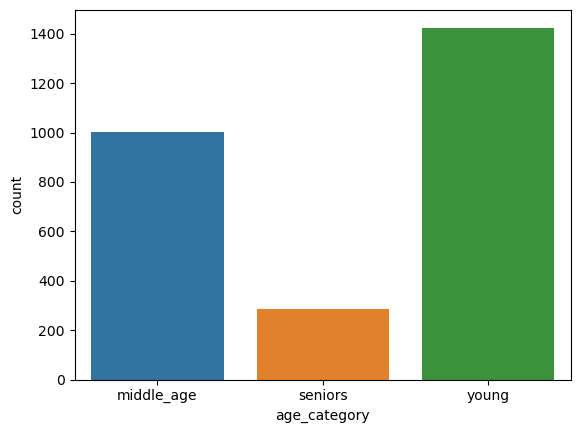

In [17]:
def cntplot_cat(df):
    for column in df.columns:
        sns.countplot(x=df[column])
        plt.show()
    return None
   

cntplot_cat(categorical2)

In [18]:
numerical.columns

Index(['age', 'annual_wages_eur', 'mp', 'starts', 'min', '90s', 'gls', 'ast',
       'g+a', 'g-pk', 'pk', 'pkatt', 'crdy', 'crdr', 'xg', 'npxg', 'xag',
       'npxg+xag', 'prgc', 'prgp', 'prgr', 'gls_90', 'ast_90', 'g+a_90',
       'g-pk_90', 'g+a-pk_90', 'xg_90', 'xag_90', 'xg+xag_90', 'npxg_90',
       'npxg+xag_90', 'touches', 'att_pen', 'att', 'succ', 'carries',
       'totdist', 'mis', 'dis', 'rec', 'position_defence', 'position_forward',
       'position_goalkeeper', 'position_midfield'],
      dtype='object')

In [19]:
categorical.columns

Index(['player', 'country_of_origin', 'team', 'league', 'position',
       'age_category'],
      dtype='object')

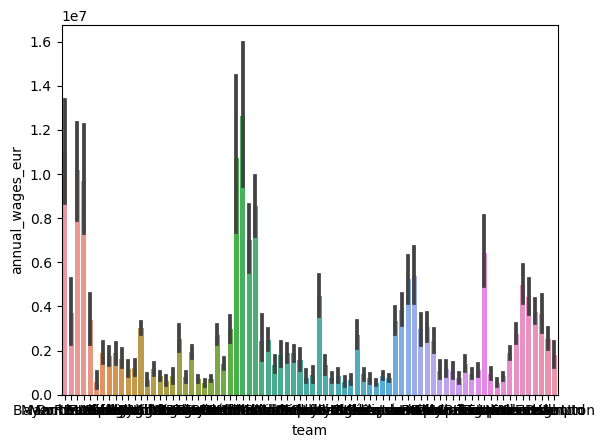

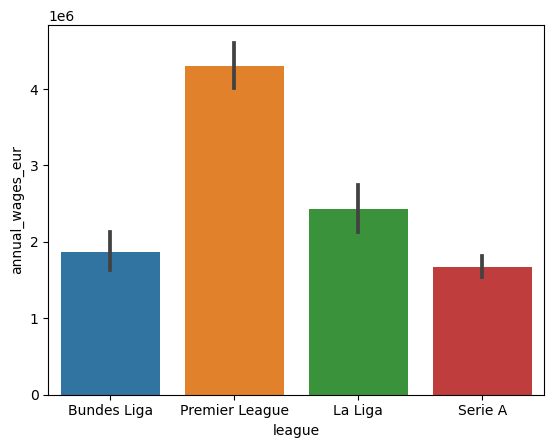

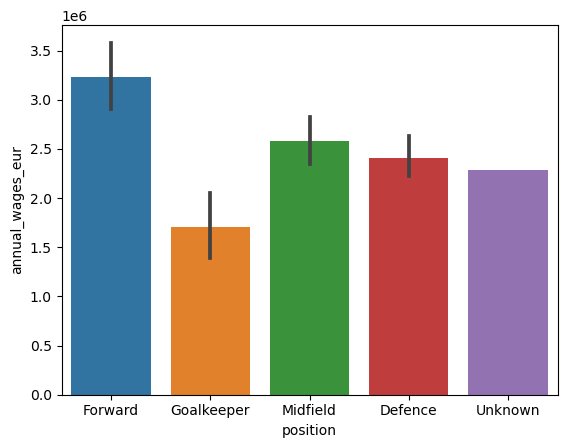

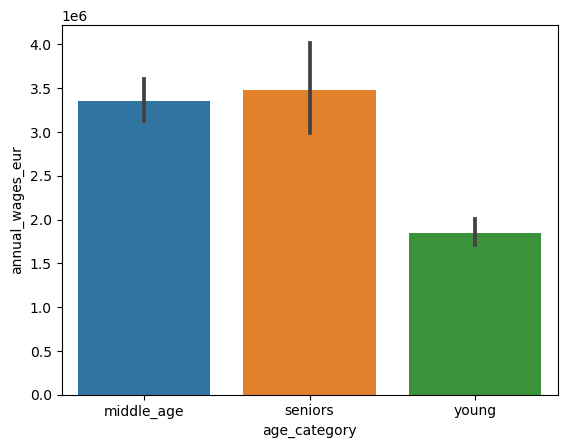

In [20]:
columns = ['team', 'league', 'position', 'age_category']

for column in columns:
    sns.barplot(x=column, y="annual_wages_eur", data=df) 
    plt.show() 

In [21]:
df_league = df.groupby(['team']).agg({'annual_wages_eur':'mean'})

In [22]:
df_league

,annual_wages_eur
team,
Almería,5.533750e+05
Arsenal,4.988880e+06
Aston Villa,3.836019e+06
Atalanta,1.379281e+06
Athletic Club,2.438077e+06
...,...
Villarreal,1.900526e+06
Werder Bremen,8.425000e+05
West Ham,4.431180e+06


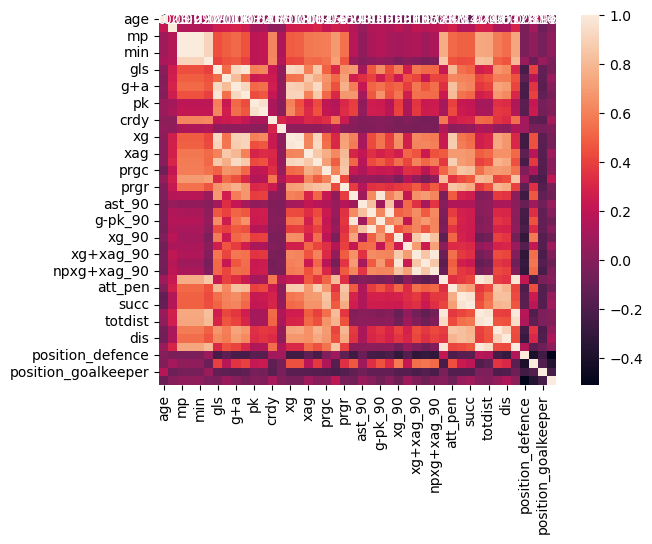

In [23]:
correlations_matrix = numerical.corr()
sns.heatmap(correlations_matrix, annot=True)
plt.show()

In [24]:
Xx = pd.concat([numerical,categorical],axis = 1)
Xx

,age,annual_wages_eur,mp,starts,min,90s,gls,ast,g+a,g-pk,...,position_defence,position_forward,position_goalkeeper,position_midfield,player,country_of_origin,team,league,position,age_category
0,30.0,22000000.0,25.0,25.0,25.0,15.800000,7.000000,5.000000,12.000000,6.000000,...,0.0,1.0,0.0,0.0,Sadio Mané,SEN,Bayern Munich,Bundes Liga,Forward,middle_age
1,36.0,21000000.0,12.0,12.0,12.0,12.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,1.0,0.0,Manuel Neuer,GER,Bayern Munich,Bundes Liga,Goalkeeper,seniors
2,32.0,20500000.0,27.0,27.0,27.0,18.500000,7.000000,8.000000,15.000000,7.000000,...,0.0,1.0,0.0,0.0,Thomas Müller,GER,Bayern Munich,Bundes Liga,Forward,seniors
3,26.0,20000000.0,32.0,32.0,32.0,22.300000,8.000000,7.000000,15.000000,8.000000,...,0.0,0.0,0.0,1.0,Leroy Sané,GER,Bayern Munich,Bundes Liga,Midfield,middle_age
4,27.0,19500000.0,33.0,33.0,33.0,31.200000,5.000000,6.000000,11.000000,4.000000,...,0.0,0.0,0.0,1.0,Joshua Kimmich,GER,Bayern Munich,Bundes Liga,Midfield,middle_age
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2708,19.0,152100.0,5.0,5.0,5.0,0.800000,0.000000,0.000000,0.000000,0.000000,...,0.0,1.0,0.0,0.0,Chem Campbell,WAL,Wolves,Premier League,Forward,young
2709,27.0,152100.0,19.0,19.0,19.0,14.030592,1.683144,1.209887,2.893031,1.540924,...,0.0,0.0,1.0,0.0,Jordan Smith,ENG,Nott'ham Forest,Premier League,Goalkeeper,middle_age
2710,22.0,121680.0,19.0,19.0,19.0,14.030592,1.683144,1.209887,2.893031,1.540924,...,0.0,0.0,1.0,0.0,Will Dennis,ENG,Bournemouth,Premier League,Goalkeeper,young
2711,18.0,121680.0,19.0,19.0,19.0,14.030592,1.683144,1.209887,2.893031,1.540924,...,1.0,0.0,0.0,0.0,Leo Fuhr Hjelde,NOR,Leeds United,Premier League,Defence,young


In [25]:
data = Xx.drop(['g-pk', 'pk', 'pkatt', 'npxg', 'xag',
       'npxg+xag', 'gls_90', 'ast_90', 'g+a_90',
       'g-pk_90', 'g+a-pk_90', 'xg_90', 'xag_90', 'xg+xag_90', 'npxg_90',
       'npxg+xag_90'], axis = 1)

In [26]:
data

,age,annual_wages_eur,mp,starts,min,90s,gls,ast,g+a,crdy,...,position_defence,position_forward,position_goalkeeper,position_midfield,player,country_of_origin,team,league,position,age_category
0,30.0,22000000.0,25.0,25.0,25.0,15.800000,7.000000,5.000000,12.000000,2.000000,...,0.0,1.0,0.0,0.0,Sadio Mané,SEN,Bayern Munich,Bundes Liga,Forward,middle_age
1,36.0,21000000.0,12.0,12.0,12.0,12.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,1.0,0.0,Manuel Neuer,GER,Bayern Munich,Bundes Liga,Goalkeeper,seniors
2,32.0,20500000.0,27.0,27.0,27.0,18.500000,7.000000,8.000000,15.000000,0.000000,...,0.0,1.0,0.0,0.0,Thomas Müller,GER,Bayern Munich,Bundes Liga,Forward,seniors
3,26.0,20000000.0,32.0,32.0,32.0,22.300000,8.000000,7.000000,15.000000,4.000000,...,0.0,0.0,0.0,1.0,Leroy Sané,GER,Bayern Munich,Bundes Liga,Midfield,middle_age
4,27.0,19500000.0,33.0,33.0,33.0,31.200000,5.000000,6.000000,11.000000,6.000000,...,0.0,0.0,0.0,1.0,Joshua Kimmich,GER,Bayern Munich,Bundes Liga,Midfield,middle_age
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2708,19.0,152100.0,5.0,5.0,5.0,0.800000,0.000000,0.000000,0.000000,0.000000,...,0.0,1.0,0.0,0.0,Chem Campbell,WAL,Wolves,Premier League,Forward,young
2709,27.0,152100.0,19.0,19.0,19.0,14.030592,1.683144,1.209887,2.893031,2.786467,...,0.0,0.0,1.0,0.0,Jordan Smith,ENG,Nott'ham Forest,Premier League,Goalkeeper,middle_age
2710,22.0,121680.0,19.0,19.0,19.0,14.030592,1.683144,1.209887,2.893031,2.786467,...,0.0,0.0,1.0,0.0,Will Dennis,ENG,Bournemouth,Premier League,Goalkeeper,young
2711,18.0,121680.0,19.0,19.0,19.0,14.030592,1.683144,1.209887,2.893031,2.786467,...,1.0,0.0,0.0,0.0,Leo Fuhr Hjelde,NOR,Leeds United,Premier League,Defence,young


In [27]:
data_numerical = data.select_dtypes(include=np.number)

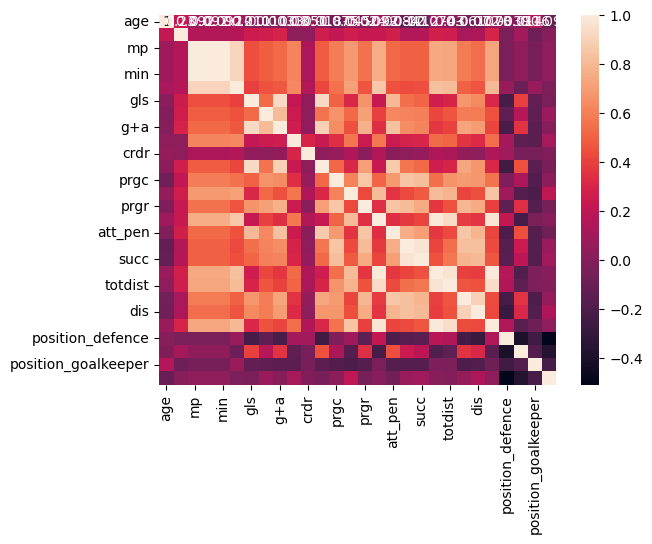

In [28]:
correlations_matrix = data_numerical.corr()
sns.heatmap(correlations_matrix, annot=True)
plt.show()

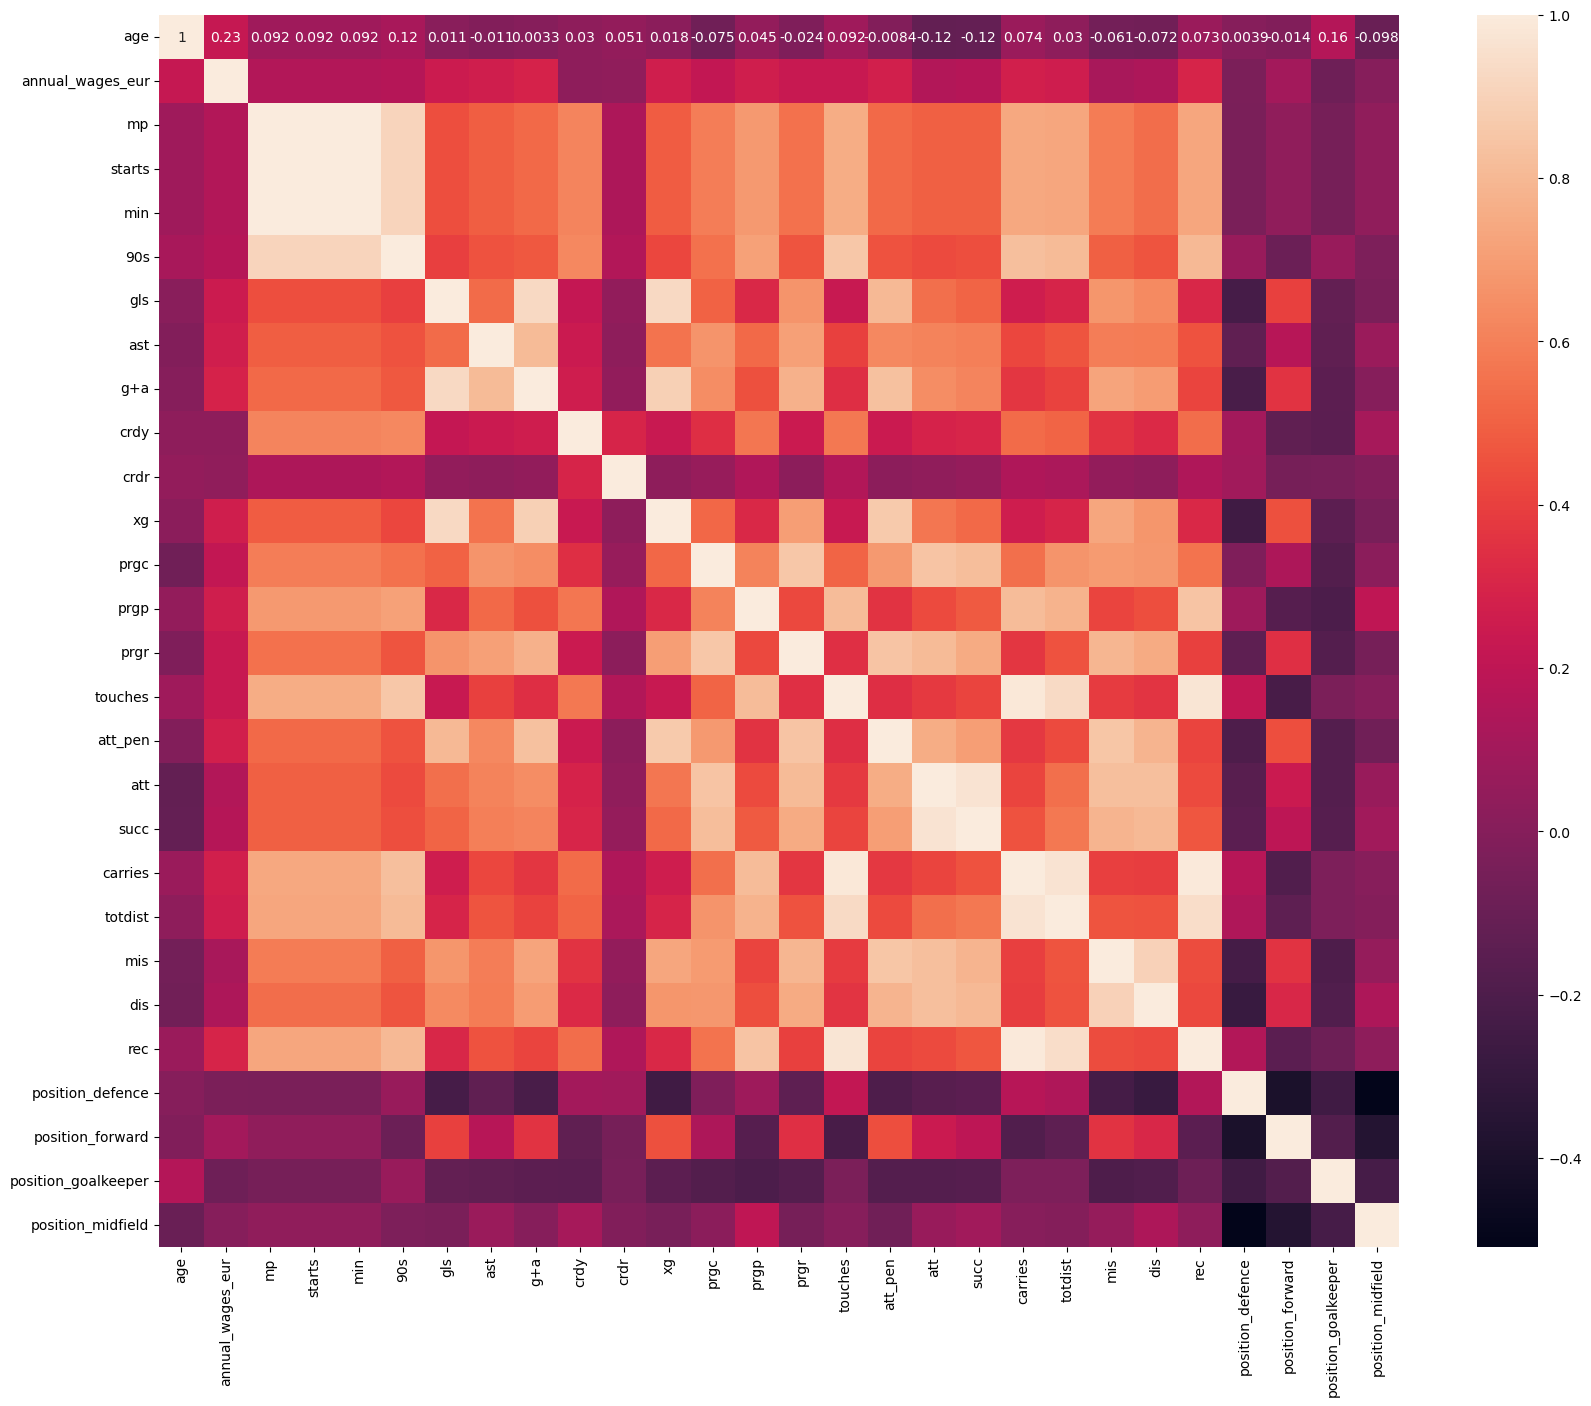

In [29]:
fig, ax=plt.subplots(figsize=(20,16))
ax=sns.heatmap(data_numerical.corr(), annot=True)
plt.show()

In [30]:
data.to_csv("cleaned_football.data.csv")

In [31]:
#Split Data into Features and Target
X = data.drop(columns=['annual_wages_eur'])
y = data['annual_wages_eur']

In [32]:
#Identify Numerical and Categorical Features:
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

In [33]:
from sklearn.pipeline import Pipeline
#Define Preprocessing Steps:
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())  # Standardize features
])

# Categorical feature transformation pipeline
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # Encode categorical variables
])

In [34]:
#Combine Preprocessing Steps Using ColumnTransformer:
from sklearn.compose import ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

In [35]:
from sklearn.metrics import mean_squared_error, r2_score

In [36]:
# Model Building
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

In [37]:
# Split the Data into Training and Testing Sets to evaluate model performance.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
#Train the Model
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['age', 'mp', 'starts', 'min', '90s', 'gls', 'ast', 'g+a', 'crdy',
       'crdr', 'xg', 'prgc', 'prgp', 'prgr', 'touches', 'att_pen', 'att',
       'succ', 'carries', 'totdist', 'mis', 'dis', 'rec', 'position_defence',
       'position_forward', 'position_goalkeeper', 'position_midfield'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['player', 'country_of_origin', 'team', 'league', 'position',
       'age_category'],
      dtype='object'))])),
                ('regressor', RandomForestRegressor(random_state=42))])

In [39]:
# Make Predictions on the Test Set
# Predict the target variable for the test set and evaluate the model.
y_pred = model.predict(X_test)

In [40]:
# Evaluate the Model | RandomForestRegressor
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Squared Error (RMSE): {rmse}')

Root Mean Squared Error (RMSE): 1966278.0701588057


In [41]:
# Evaluate the Model | RandomForestRegressor
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R² (Coefficient of Determination): {r2}')

Root Mean Squared Error (RMSE): 1966278.0701588057
R² (Coefficient of Determination): 0.618222546441995


In [42]:
# Linear Regression Model
model2 = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

In [43]:
model2.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['age', 'mp', 'starts', 'min', '90s', 'gls', 'ast', 'g+a', 'crdy',
       'crdr', 'xg', 'prgc', 'prgp', 'prgr', 'touches', 'att_pen', 'att',
       'succ', 'carries', 'totdist', 'mis', 'dis', 'rec', 'position_defence',
       'position_forward', 'position_goalkeeper', 'position_midfield'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['player', 'country_of_origin', 'team', 'league', 'position',
       'age_category'],
      dtype='object'))])),
                ('regressor', LinearRegression())])

In [44]:
y_pred2 = model2.predict(X_test)

In [45]:
rmse2 = np.sqrt(mean_squared_error(y_test, y_pred2))
rmse2
r2_2 = r2_score(y_test, y_pred2)
print(f'Linear Regression RMSE: {rmse2}')
print(f'Linear Regression R²: {r2_2}')

Linear Regression RMSE: 2576610.017137722
Linear Regression R²: 0.3444319378800774


In [46]:
# KNN Model
model3 = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', KNeighborsRegressor(n_neighbors=7))  
])

In [47]:
model3.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['age', 'mp', 'starts', 'min', '90s', 'gls', 'ast', 'g+a', 'crdy',
       'crdr', 'xg', 'prgc', 'prgp', 'prgr', 'touches', 'att_pen', 'att',
       'succ', 'carries', 'totdist', 'mis', 'dis', 'rec', 'position_defence',
       'position_forward', 'position_goalkeeper', 'position_midfield'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['player', 'country_of_origin', 'team', 'league', 'position',
       'age_category'],
      dtype='object'))])),
                ('regressor', KNeighborsRegressor(n_neighbors=7))])

In [48]:
y_pred3 = model3.predict(X_test)

In [49]:
rmse3 = np.sqrt(mean_squared_error(y_test, y_pred3))
r2_3 = r2_score(y_test, y_pred3)
print(f'KNN Regressor RMSE: {rmse3}')
print(f'KNN Regressor R²: {r2_3}')

KNN Regressor RMSE: 2608996.309127799
KNN Regressor R²: 0.32784824766990406


In [50]:
# Decision Tree Regressor Model
from sklearn.model_selection import cross_val_score

model4 = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', DecisionTreeRegressor(random_state=42))
])

In [51]:
model4.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['age', 'mp', 'starts', 'min', '90s', 'gls', 'ast', 'g+a', 'crdy',
       'crdr', 'xg', 'prgc', 'prgp', 'prgr', 'touches', 'att_pen', 'att',
       'succ', 'carries', 'totdist', 'mis', 'dis', 'rec', 'position_defence',
       'position_forward', 'position_goalkeeper', 'position_midfield'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['player', 'country_of_origin', 'team', 'league', 'position',
       'age_category'],
      dtype='object'))])),
                ('regressor', DecisionTreeRegressor(random_state=42))])

In [52]:
y_pred4 = model4.predict(X_test)

In [53]:
rmse4 = np.sqrt(mean_squared_error(y_test, y_pred4))
r2_4 = r2_score(y_test, y_pred4)
print(f'DecisionTreeRegressor RMSE: {rmse4}')
print(f'DecisionTreeRegressor R²: {r2_4}')

DecisionTreeRegressor RMSE: 2491657.1253435947
DecisionTreeRegressor R²: 0.3869484931717878


In [54]:
print("RandomForest Regressor:", rmse)
print("Linear Regression:", rmse2)
print("K-Nearest Neighbors:", rmse3)
print("Decision Tree Regressor:", rmse4)

RandomForest Regressor: 1966278.0701588057
Linear Regression: 2576610.017137722
K-Nearest Neighbors: 2608996.309127799
Decision Tree Regressor: 2491657.1253435947


In [55]:
print(f'RandomForest Regressor R²: {r2}')
print(f'Linear Regression R²: {r2_2}')
print(f'KNN Regressor R²: {r2_3}')
print(f'DecisionTreeRegressor R²: {r2_4}')

RandomForest Regressor R²: 0.618222546441995
Linear Regression R²: 0.3444319378800774
KNN Regressor R²: 0.32784824766990406
DecisionTreeRegressor R²: 0.3869484931717878


In [ ]:
# Create the target_score column:
data['contrib_score'] = data['g+a'].apply(lambda x: 1 if x > 0 else 0)
contrib_score = data[data['contrib_score'].isin([0, 1])][['contrib_score', 'annual_wages_eur']].rename(columns={'annual_wages_eur': 'target_salary'})

In [ ]:
contrib_score

In [ ]:
# contrib_score.to_csv('target_score.csv', index=False)

In [ ]:
contrib_score.isna().sum()